# Getting started with Task 3

Download the dataset from the [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106) using the script `download_intracardiac_dataset.sh`:

```bash
source download_intracardiac_dataset.sh
```

## Load Modules and Preprocessing Functions

Load modules and preprocessing functions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'

In [4]:
import glob, re, os
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [5]:
drive_path = '/content/drive/MyDrive/cardiac_challenge_team6'

Load the `cardiac_ml_tools` module.

In [ ]:
%run $drive_path/notebooks/cardiac_ml_tools.py

## Load the dataset

## Dataset details

The dataset [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106)
consists of pairs of computationally simulated intracardiac transmembrane voltage recordings and ECG signals.
In total, 16140 organ-level simulations were conducted to create this dataset.
Simulations were performed using Lassen supercomputer at Lawrence Livermore National Lab (LLNL), concurrently utilizing 4 GPUs and 40 CPU cores.
Each simulation produced pairs of 500ms-by-10 raw electrode signals and 500ms-by-75 transmembrane voltage signals.
For convenience, we collect those signals in matrices and give them the following names:

Tensor | Description | Shape | Notes
--- | --- | --- | ---
$X$ | Row electrode signals | $10 \times 500$ | 10-lead ECG signals from the simulated torso (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$V$ | Activation map | $75 \times 500$ | Transmembrane voltage signals from the simulated heart (in [Dataset of Simulated Intracardiac Transmembrane Voltage Recordings and ECG Signals](https://library.ucsd.edu/dc/object/bb29449106))
$E$ | 12-lead ECG signals | $12 \times 500$ | 12-lead ECG signals obtained by `get_standard_leads`($X$)
$A$ | Activation map | $75 \times 1$ | Activation time, defined as $A_i = \text{min}_j(V_{ij})$

**IMPORTANT** : The raw data in the dataset consists of 10-lead ECG signals and 75-lead transmembrane voltage signals. The 12-lead ECG signals are obtained from the 10-lead ECG signals using the function `get_standard_leads` (in the file `cardiac_ml_tools.py`).

The overall generation process is shown in the following image. The ECG signal is recorded using 10 virtual electrodes and the transmembrane voltages are recorded at 75 points within the myocardium. The transmembrane voltages are then used to generate the spatio-temporal activation maps.

![ECG 10 2 12](../figures/data_generation.png)

## Getting the standard 12-lead ECG from the 10-lead ECG

The function `get_standard_leads` (in the file `cardiac_ml_tools.py`) is used to obtain the 12-lead ECG signals from the 10-lead ECG signals. It implements the following transformation, where the (Wilson Lead) is defined as $Vw = 1/3*(RA + LA + LL)$:
$$
\left\{
\begin{array}{lll}
    X_{:,1}  & \to  & RA \\
    X_{:,2}  & \to  & LA \\
    X_{:,3}  & \to  & LL \\
    X_{:,4}  & \to  & RL \\
    X_{:,5}  & \to  & V1 \\
    X_{:,6}  & \to  & V2 \\
    X_{:,7}  & \to  & V3 \\
    X_{:,8}  & \to  & V4 \\
    X_{:,9}  & \to  & V5 \\
    X_{:,10} & \to &  V6 \\
\end{array}
\right.
\text{        and        }
\left\{
\begin{array}{lll}          
\text{Lead } I& : & LA - RA \\
\text{Lead } II& : & LL - RA \\
\text{Lead } III& : & LL - LA \\
\text{Lead } aVR& : &  \frac{3}{2} (RA - Vw) \\
\text{Lead } aVL& : &  \frac{3}{2} (LA - Vw) \\
\text{Lead } aVF& : &  \frac{3}{2} (LL - Vw)\\
\text{Lead } V1 & : & V1 - Vw \\
\text{Lead } V2 & : & V2 - Vw \\
\text{Lead } V3 & : & V3 - Vw \\
\text{Lead } V4 & : & V4 - Vw \\
\text{Lead } V5 & : & V5 - Vw \\
\text{Lead } V6 & : & V6 - Vw \\
\end{array}
\right.
$$


In [ ]:
# Example of file pair
case = 213
# ECG plot
row = 3
column = 4
num_timesteps = 500
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12} # reorder the leads to standard 12-lead ECG display

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

# create a figure with 12 subplots
for i in range(pECGData.shape[1]):
    plt.subplot(row, column, reorder[i + 1])
    plt.plot(pECGData[0:num_timesteps,i],'r')
    plt.title(titles[i])
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel('msec')
    plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

## Getting the transmembrane voltages

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


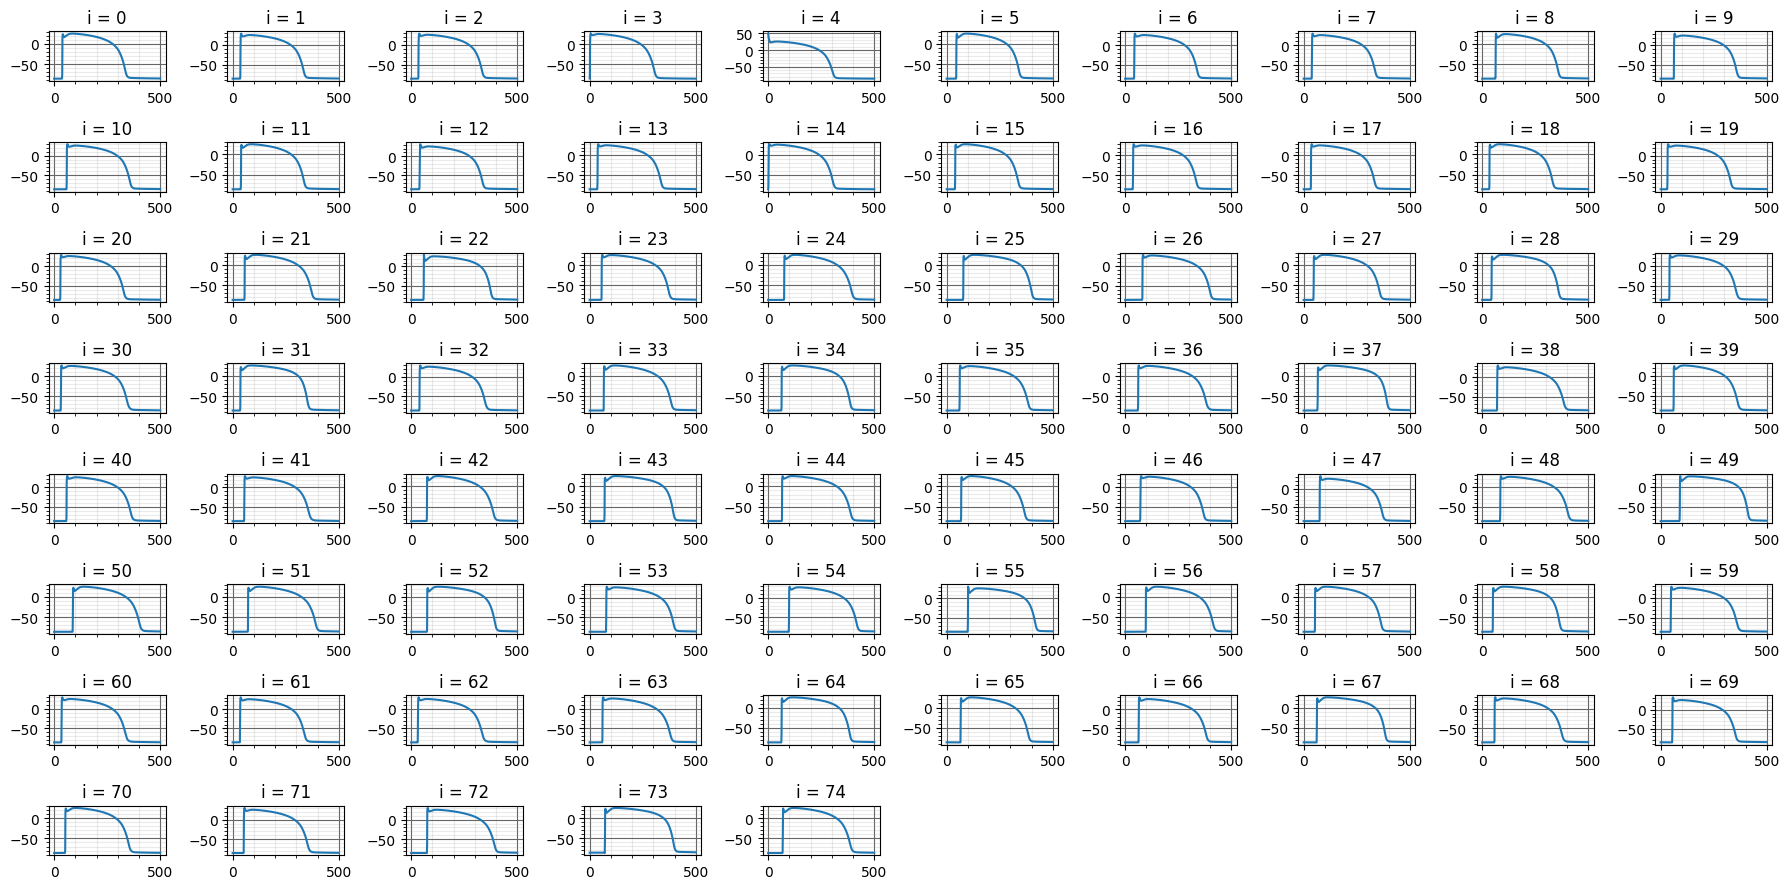

In [ ]:
# Example of file pair
case = 213
# Vm plot
row = 7
column = 10
plt.figure(figsize=(18, 9))

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()


## Task 4: Learning the mapping from the 12-lead ECG to the 75 transmembrane voltages

Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy
Case 213 : /content/drive/MyDrive/cardiac_challenge_team6/intracardiac_dataset/data_hearts_dd_0p2_geo_inn_act_1_bcl/pECGData_hearts_dd_0p2_geo_inn_act_1_bcl_bcl.1000.innerindex.74.volunteer.v14.npy


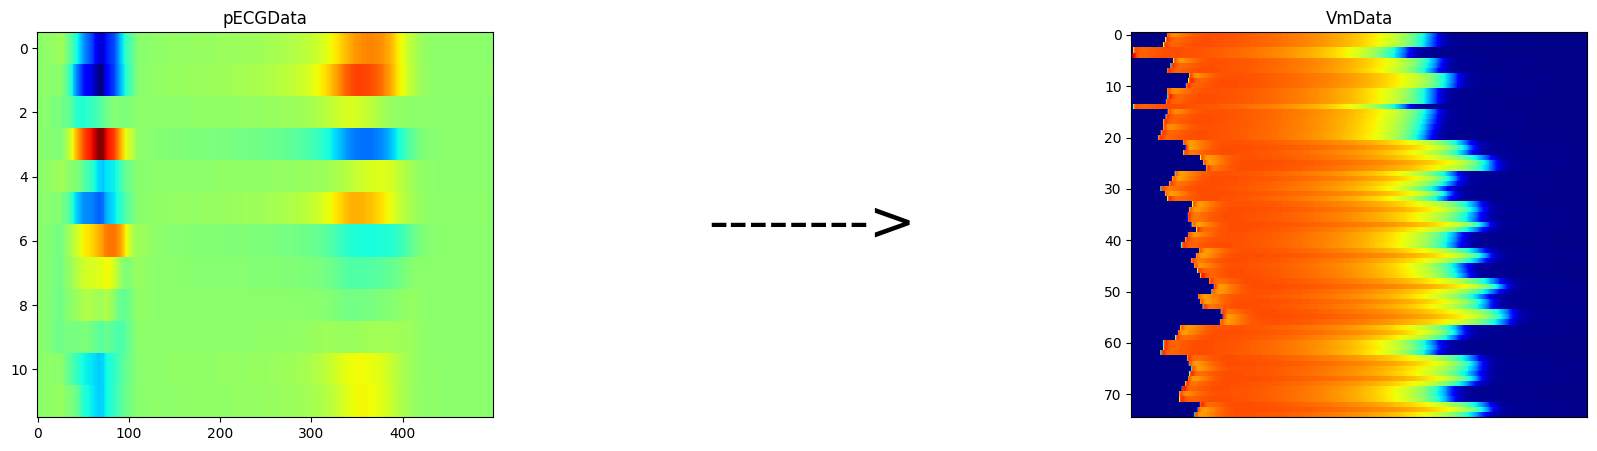

In [ ]:
# make a plot with the "pECGData" -> "ActTime"
case = 213

print('Case {} : {}'.format(case, file_pairs[case][0]))
pECGData = np.load(file_pairs[case][0])
pECGData = get_standard_leads(pECGData)

print('Case {} : {}'.format(case, file_pairs[case][0]))
VmData = np.load(file_pairs[case][1])

# plot in row the tensors pECGData and ActTime with an arrow pointing to the activation time
row = 1
column = 3
plt.figure(figsize=(20, 5))
plt.subplot(row, column, 1)
# plot pECGData transposed
plt.imshow(pECGData.T, cmap='jet', interpolation='nearest', aspect='auto')
plt.title('pECGData')
plt.subplot(row, column, 2)
# print a text "->"
plt.text(0.5, 0.5, '-------->', fontsize=40, horizontalalignment='center', verticalalignment='center')
plt.axis('off')
plt.subplot(row, column, 3)
# plot Vm transposed
plt.imshow(VmData.T, cmap='jet', interpolation='nearest', aspect='auto')
# not xticks
plt.xticks([])
plt.title('VmData')
plt.show()
plt.close()

# Tricks

- As in many machine learning problems, normalization of the data might be helpful or even necessary. Different normalization schemes might be applied.

In [6]:
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
X = np.load(f'{drive_path}/Task_3_4_Data/ECG_Data.npy')
y = np.load(f'{drive_path}/Task_3_4_Data/VmData.npy')

In [8]:
def min_max_normalize(data, min_range=0, max_range=1):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val) * (max_range - min_range) + min_range
    return normalized_data

In [ ]:
# X = X.reshape(16117, 500, 12)

In [ ]:
X.shape

(16117, 500, 12)

In [10]:
y_normalized = min_max_normalize(y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2)

In [12]:
import tensorflow.keras.backend as K
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [13]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv1DTranspose

In [14]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res/(SS_tot + K.epsilon())

In [15]:
class FireLayer(tf.keras.layers.Layer):
    def __init__(self, squeeze_filters, expand_filters, **kwargs):
        super(FireLayer, self).__init__(**kwargs)
        self.squeeze = Conv1D(squeeze_filters, 1, activation='relu', padding='valid')
        self.expand1x1 = Conv1D(expand_filters, 1, activation='relu', padding='valid')
        self.expand3x3 = Conv1D(expand_filters, 3, activation='relu', padding='same')

    def call(self, inputs):
        x = self.squeeze(inputs)
        output = tf.concat([self.expand1x1(x), self.expand3x3(x)], axis=-1)
        return output

In [18]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


model = Sequential()

model.add(Conv1D(64, 3, activation='relu', strides = 1, padding = 'same', input_shape=(500, 12)))

# # Add a max pooling layer
model.add(MaxPooling1D(pool_size=3, strides = 1, padding = 'same'))

model.add(FireLayer(16, 64))

model.add(FireLayer(16, 64))

# # Add a max pooling layer
model.add(MaxPooling1D(pool_size=3, strides = 1, padding = 'same'))

model.add(FireLayer(32, 128))

model.add(FireLayer(32, 128))

# # Add a max pooling layer
model.add(MaxPooling1D(pool_size=3, strides = 1, padding = 'same'))

model.add(FireLayer(48, 192))

model.add(FireLayer(48, 192))

model.add(FireLayer(64, 256))

model.add(FireLayer(64, 256))

# model.add(Conv1D(75, 3, activation='relu', strides = 2, padding = 'valid'))

# model.add(tf.keras.layers.AveragePooling1D(pool_size=2))

model.add(Dropout(0.1))

model.add(Conv1D(75, 1, activation='relu', strides = 1, padding = 'valid'))

# model.add(tf.keras.layers.AveragePooling1D(pool_size=3))

# model.add(MaxPooling1D(pool_size=7, strides = 2))
# tf.keras.layers.Dense(10, activation='softmax')

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r_squared])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 500, 64)           2368      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 500, 64)          0         
 1D)                                                             
                                                                 
 fire_layer_8 (FireLayer)    (None, 500, 128)          5264      
                                                                 
 fire_layer_9 (FireLayer)    (None, 500, 128)          6288      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 500, 128)         0         
 1D)                                                             
                                                                 
 fire_layer_10 (FireLayer)   (None, 500, 256)         

In [1]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

NameError: ignored

In [ ]:
y_pred_normalized = model.predict(X_test)

101/101 [==============================] - 0s 3ms/step


In [ ]:
def unnormalize_data(normalized_data, min_val, max_val):
    min_range = 0
    max_range = 1
    unnormalized_data = (normalized_data - min_range) / (max_range - min_range) * (max_val - min_val) + min_val
    return unnormalized_data

In [ ]:
min_val = np.min(y)
max_val = np.max(y)

In [ ]:
y_pred = unnormalize_data(y_pred_normalized, min_val, max_val)
y_test_unnormalized = unnormalize_data(y_test, min_val, max_val)

In [ ]:
y_pred[0][0][:10]

array([-84.545166, -84.86938 , -84.41016 , -84.67538 , -84.6613  ,
       -85.74062 , -85.44754 , -84.99618 , -84.78819 , -85.45265 ],
      dtype=float32)

In [ ]:
y_test_unnormalized[0][0][:10]

array([-85.52892285, -85.56650767, -85.56652142, -85.52920007,
       -85.56652106, -85.56652142, -85.53278496, -85.56651614,
       -85.56652142, -85.53018704])

In [ ]:
y_pred.T.shape

(75, 500, 3224)

In [ ]:

y_test_unnormalized.T.shape

(75, 500, 3224)

In [ ]:
# Calculate the difference between the arrays
difference = abs(y_pred - y_test_unnormalized)

# Calculate the average difference
avg_difference = np.mean(difference)
print("Average Difference:", avg_difference)

Average Difference: 6.464651654533145


In [ ]:
# Calculate the standard deviation of the data
std_deviation = np.std(difference)
print("Standard Deviation:", std_deviation)

Standard Deviation: 11.53497182238804


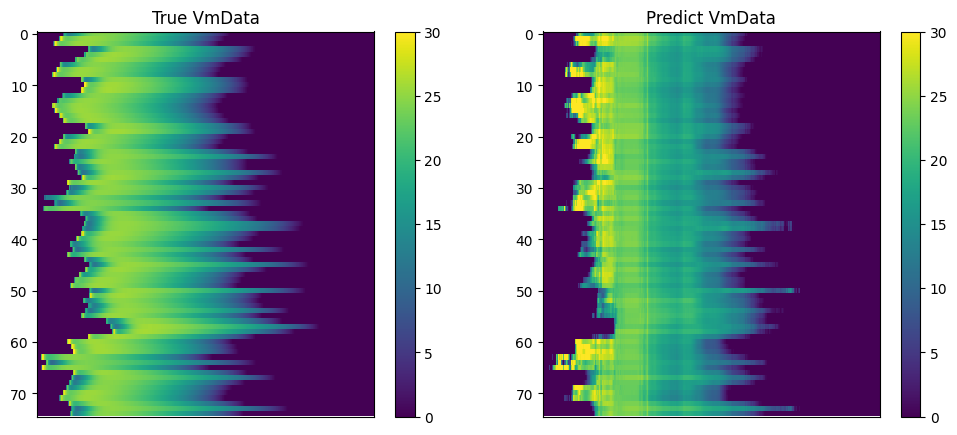

In [ ]:
row = 1
column = 4
plt.figure(figsize=(25, 5))
plt.subplot(row, column, 1)
plt.imshow(y_test_unnormalized[0].T, cmap='viridis', interpolation='nearest', aspect='auto', vmin=0, vmax=30)
# not xticks
plt.xticks([])
plt.colorbar()
plt.title('True VmData')

plt.subplot(row, column, 2)
plt.imshow(y_pred[0].T, cmap='viridis', interpolation='nearest', aspect='auto', vmin=0, vmax=30)
plt.xticks([])
plt.colorbar()
plt.title('Predict VmData')
plt.show()
plt.close()
# plot Vm transposed

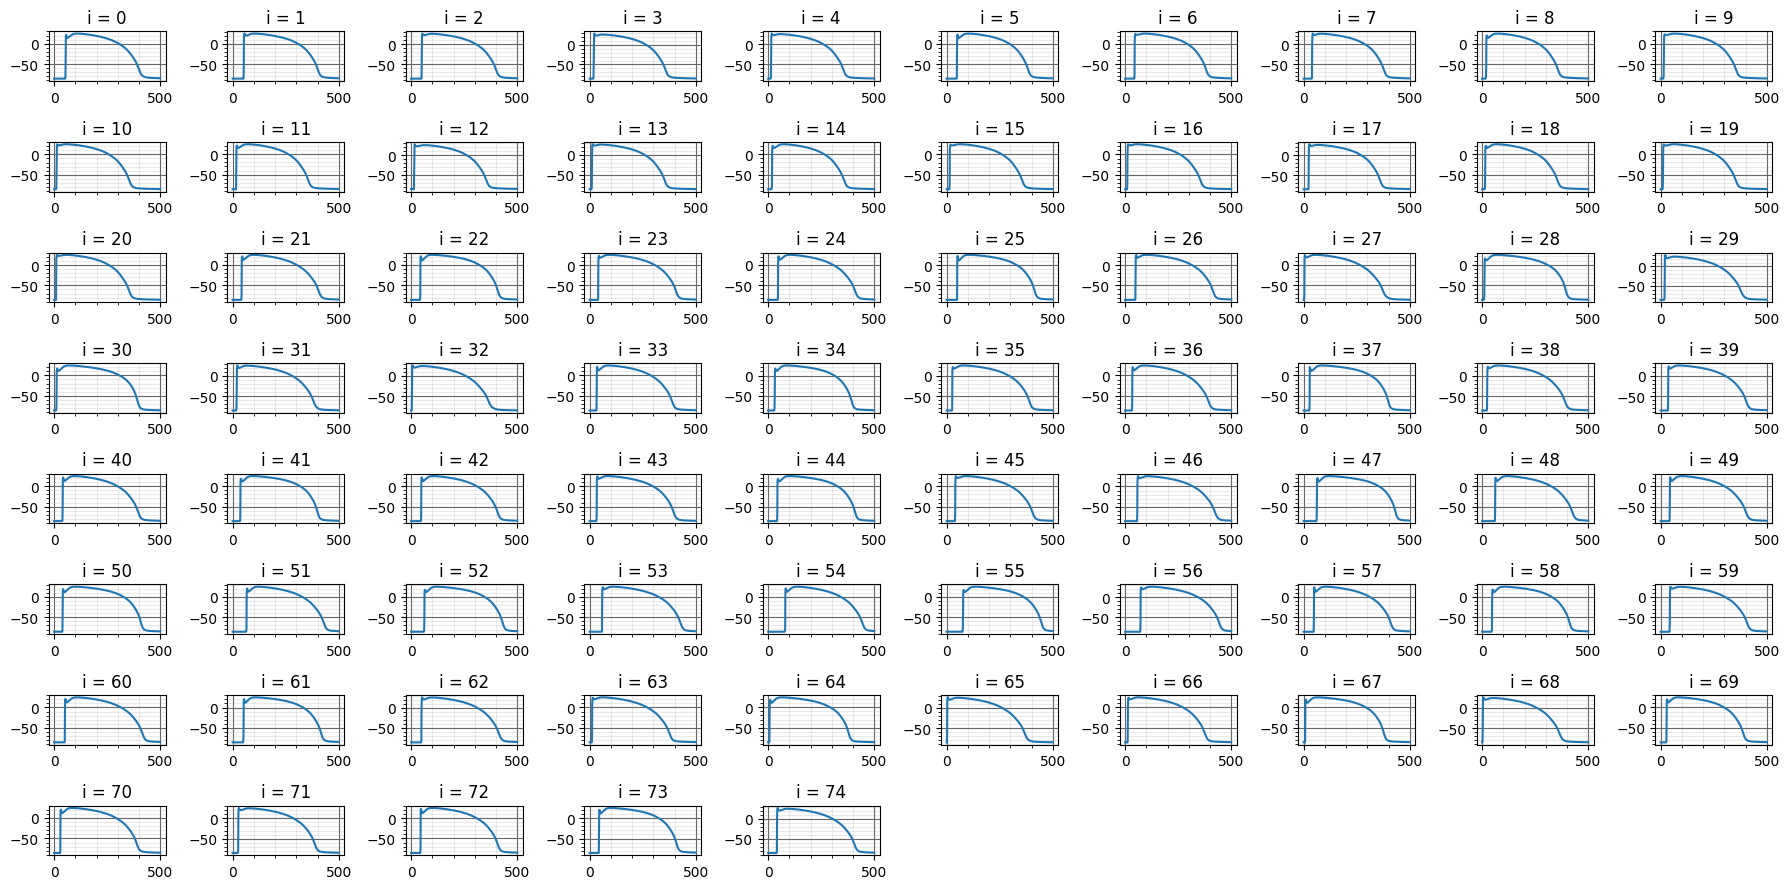

In [ ]:
plt.figure(figsize=(18, 9))
VmData = y_test_unnormalized[1]

for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:num_timesteps,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

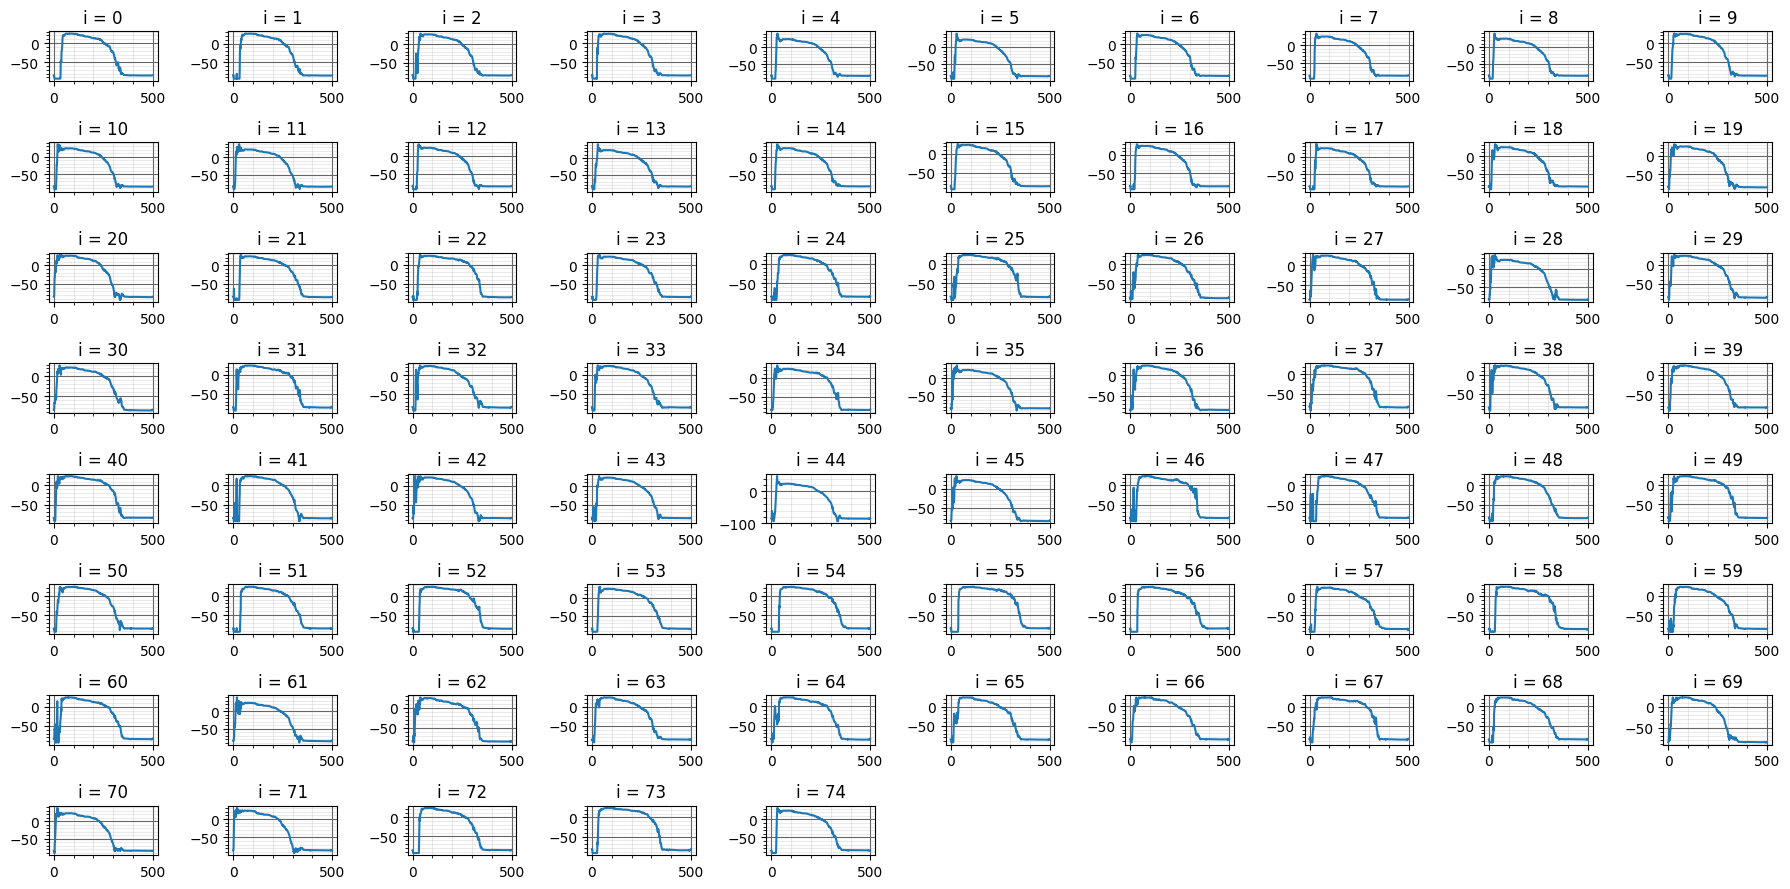

In [ ]:
plt.figure(figsize=(18, 9))
VmData = y_pred[1]

for count, i in enumerate(range(VmData.shape[1])):
    plt.subplot(8, 10, count + 1)
    plt.plot(VmData[0:500,i])
    plt.title(f'i = {i}')
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    # plt.xlabel('msec')
    # plt.ylabel('mV')
plt.tight_layout()
plt.show()
# close
plt.close()

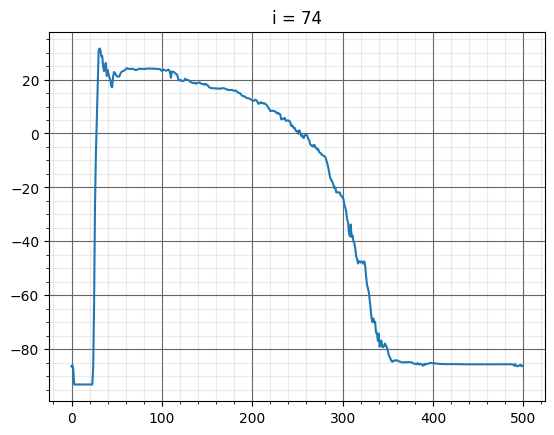

In [ ]:

plt.plot(VmData[0:500,i])
plt.title(f'i = {i}')
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)